Pixel-wise image segmentation is a well-studied problem in computer vision. The task of semantic image segmentation is to classify each pixel in the image

# What is Image Segmentation?

Semantic image segmentation is the task of classifying each pixel in an image from a predefined set of classes.

In particular, our goal is to take an image of size W x H x 3 and generate a W x H matrix containing the predicted class ID’s corresponding to all the pixels.

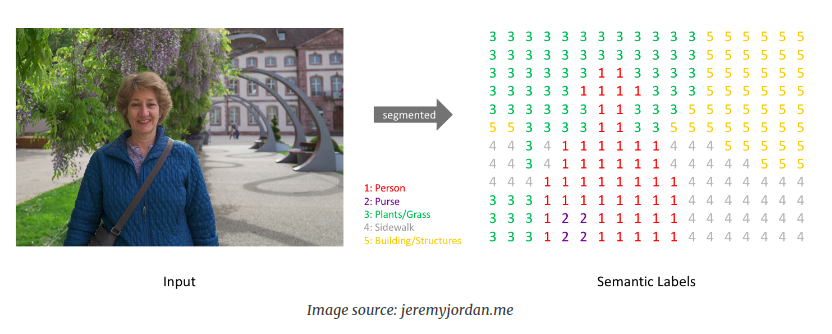

In [2]:
from IPython.display import Image
Image(filename='./images/seg1.png')

Semantic segmentation is different from object detection as it does not predict any bounding boxes around the objects. We do not distinguish between different instances of the same object.

The algorithm should figure out the objects present and also the pixels which correspond to the object. 

When using a CNN for semantic segmentation, the output is also an image rather than a fixed length vector.

# Convolutional neural networks for segmentation

Usually, the architecture of the model contains several convolutional layers, non-linear activations, batch normalization, and pooling layers. The initial layers learn the low-level concepts such as edges and colors and the later level layers learn the higher level concepts such as different objects.

At a lower level, the neurons contain information for a small region of the image, whereas at a higher level the neurons contain information for a large region of the image. Thus, as we add more layers, the size of the image keeps on decreasing and the number of channels keeps on increasing

For the case of image classification, we need to map the spatial tensor from the convolution layers to a fixed length vector. To do that, fully connected layers are used, which destroy all the spatial information.

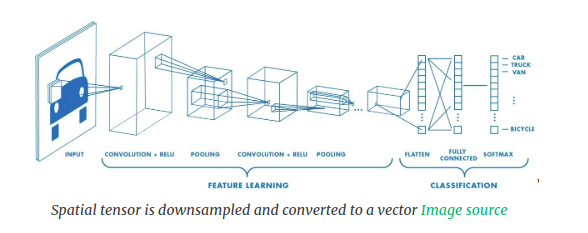

In [4]:
Image(filename='./images/seg2.png')

For the task of semantic segmentation, we need to retain the spatial information, hence no fully connected layers are used. That’s why they are called fully convolutional networks. 

 * The convolutional layers coupled with downsampling layers produce a low-resolution tensor containing the high-level information.

Taking the low-resolution spatial tensor, which contains high-level information, we have to produce high-resolution segmentation outputs. To do that we add more convolution layers coupled with upsampling layers which increase the size of the spatial tensor.

This is called an encoder-decoder structure. Where the layers which downsample the input are the part of the encoder and the layers which upsample are part of the decoder.

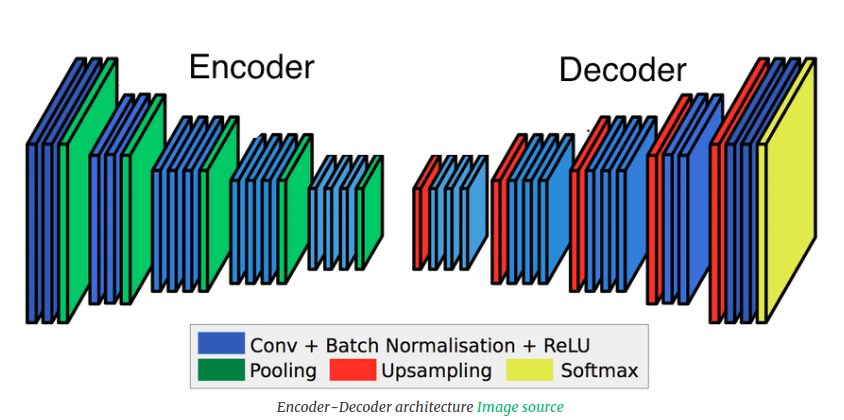

In [6]:
Image(filename='./images/seg3.png')

When the model is trained for the task of semantic segmentation, the encoder outputs a tensor containing information about the objects, and its shape and size. The decoder takes this information and produces the segmentation maps.

# Skip connections

If we simply stack the encoder and decoder layers, there could be loss of low-level information. Hence, the boundaries in segmentation maps produced by the decoder could be inaccurate.

To make up for the information lost, we let the decoder access the low-level features produced by the encoder layers. That is accomplished by skip connections. Intermediate outputs of the encoder are added/concatenated with the inputs to the intermediate layers of the decoder at appropriate positions.

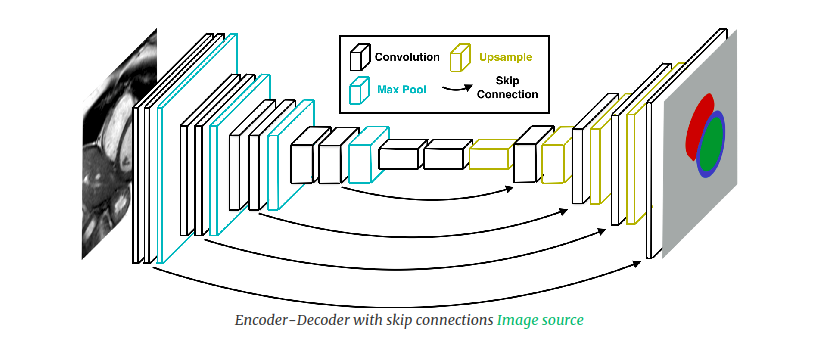

In [7]:
Image(filename='./images/seg4.png')

The skip connections from the earlier layers provide the necessary information to the decoder layers which is required for creating accurate boundaries.

# Transfer Learning

The CNN models trained for image classification contain meaningful information which can be used for segmentation as well. We can re-use the convolution layers of the pre-trained models in the encoder layers of the segmentation model. Using Resnet or VGG pre-trained on ImageNet dataset is a popular choice. 

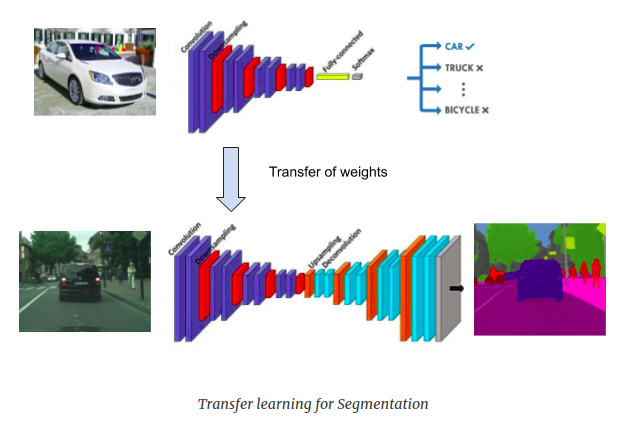

In [8]:
Image(filename='./images/seg5.png')

# Loss Function

Each pixel of the output of the network is compared with the corresponding pixel in the ground truth segmentation image. We apply standard cross-entropy loss on each pixel.

We will be using Keras for building and training the segmentation models. First, install keras_segmentation which contains all the utilities required

# Dataset

* We would need the input RGB images and the corresponding segmentation images.

* If you want to make your own dataset, a tool like labelme or GIMP can be used to manually generate the ground truth segmentation masks.

* Assign each class a unique ID.

* In the segmentation images, the pixel value should denote the class ID of the corresponding pixel. This is a common format used by most of the datasets and keras_segmentation.

* For the segmentation maps, do not use the jpg format as jpg is lossy and the pixel values might change.

* Use bmp or png format instead. And of course, the size of the input image and the segmentation image should be the same.


In the following example, pixel (0,0) is labeled as class 2, pixel (3,4) is labeled as class 1 and rest of the pixels are labeled as class 0.

In [9]:
import cv2
import numpy as np

ann_img = np.zeros((30,30,3)).astype('uint8')
ann_img[ 3 , 4 ] = 1 # this would set the label of pixel 3,4 as 1
ann_img[ 0 , 0 ] = 2 # this would set the label of pixel 0,0 as 2

cv2.imwrite( "./images/ann_1.png" ,ann_img)

True

In [10]:
Image(filename='./images/ann_1.png')

After generating the segmentation images, place them in the training/testing folder. Make separate folders for input images and the segmentation images. The file name of the input image and the corresponding segmentation image should be the same.

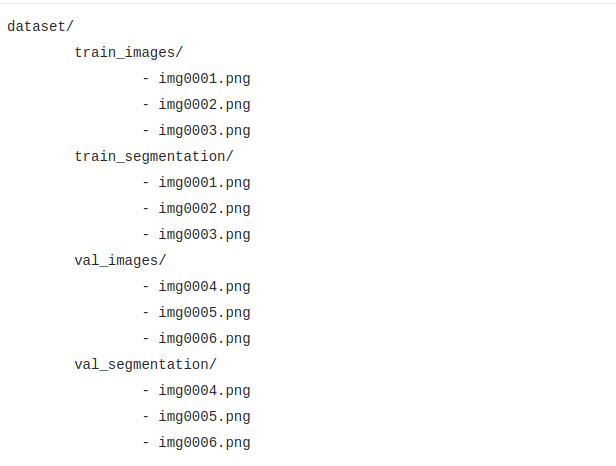

In [11]:
Image(filename='./images/seg6.png')

# Data Augmentation

* We can increase the size of the dataset by applying random transformations on the images.

* We can change the color properties like hue, saturation, brightness, etc of the input images. We can also apply transformations such as rotation, scale, and flipping. 

* For the transformations which change the location of the pixels, the segmentation image should also be transformed the same way.

* Imgaug is an amazing tool to perform image augmentation.

# Choosing the model

There are several models available for semantic segmentation. The model architecture shall be chosen properly depending on the use case. There are several things which should be taken into account:

1. The number of training images
2. Size of the images
3. The domain of the images

Usually, deep learning based segmentation models are built upon a base CNN network. A standard model such as ResNet, VGG or MobileNet is chosen for the base network usually. Some initial layers of the base network are used in the encoder, and rest of the segmentation network is built on top of that. For most of the segmentation models, any base network can be used.

# Choosing the base model

For many applications, choosing a model pre-trained on ImageNet is the best choice.

ResNet:

This is the model proposed by Microsoft which got 96.4% accuracy in the ImageNet 2016 competition. ResNet is used as a pre-trained model for several applications. ResNet has large number of layers along with residual connections which make it’s training feasible.

VGG-16

This is the model proposed by Oxford which got 92.7% accuracy in the ImageNet 2013 competition. Compared to Resnet it has lesser layers, hence it is much faster to train. For most of the existing segmentation benchmarks, VGG does not perform as good as ResNet in terms of accuracy. Before ResNet, VGG was the standard pre-trained model in for a large number of applications.

MobileNet:

This model is proposed by Google which is optimized for having a small model size and faster inference time. This is ideal to run on mobile phones and resource-constrained devices. Due to the small size, there could be a small hit in the accuracy of the model.

Custom-CNN

Custom CNN: Apart from using an ImageNet pre-trained model, a custom network can be used as a base network. If the segmentation application is fairly simple, ImageNet pre-training is not necessary. Another advantage of using a custom base model is that we can customize it according to the application.

If the domain of the images for the segmentation task is similar to ImageNet then ImageNet pre-trained models would be beneficial. For input images of indoor/ outdoor images having common objects like cars, animals, humans, etc ImageNet pre-training could be helpful. 

After selecting the base network we have to select the segmentation architecture. Let’s go over some popular segmentation models.

# FCN

FCN is one of the first proposed models for end-to-end semantic segmentation. Here standard image classification models such as VGG and AlexNet are converted to fully convolutional by making FC layers 1x1 convolutions.


The three variants are FCN8, FCN16 and FCN32. In FCN8 and FCN16, skip connections are used.

# Segnet

SegNet : The SegNet architecture adopts an encoder-decoder framework. The encoder and decoder layers are symmetrical to each other. The upsampling operation of the decoder layers use the max-pooling indices of the corresponding encoder layers. 

# Unet

UNet : The UNet architecture adopts an encoder-decoder framework with skip connections. Like SegNet, the encoder and decoder layers are symmetrical to each other


* For the images in the medical domain, UNet is the popular choice. Due to the skip connections, UNet does not miss out the tiny details. UNet could also be useful for indoor/outdoor scenes with small size objects.

# PSPnet

* The Pyramid Scene Parsing Network is optimized to learn better global context representation of a scene. 

* First, the image is passed to the base network to get a feature map. The the feature map is downsampled to different scales. Convolution is applied to the pooled feature maps. After that, all the feature maps are upsampled to a common scale and concatenated together. Finally a another convolution layer is used to produce the final segmentation outputs.

* For images containing indoor and outdoor scenes, PSPNet is preferred,

For simple datasets, with large size and a small number of objects, UNet and PSPNet could be an overkill. Here simple models such as FCN or Segnet could be sufficient.

# Choosing the input size

Apart from choosing the architecture of the model, choosing the model input size is also very important. If there are a large number of objects in the image, the input size shall be larger. In some cases, if the input size is large, the model should have more layers to compensate. The standard input size is somewhere from 200x200 to 600x600. A model with a large input size consumes more GPU memory and also would take more time to train.